## Goal: Run regression tree model and identify if it improves model performance over Regan's

In [ ]:
import warnings
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn

In [ ]:
from pandas_profiling import ProfileReport

# Read Collector's Data

In [ ]:
df = pd.read_excel('RSS Master Data File.xlsx', engine='openpyxl',parse_dates=True)
df.head()

,Date,Day,Route,Truck #,Vehicle Type,Commodity,Tipper,Sequence #,Address #,Apt.#,Street,Even/Odd,Meandor,I or C?,Time,Block Time,#Units,Number of Stops,16 gal,20 gal,32 gal,64 gal,96 gal,CCAN,1 yd,1.5 yd,2 yd,3 yd,4 yd,5 yd,6 yd,Cardboard Box,Trash Bags,Hill or Flat?,Street Sweeping,Locked,Common Notes,Additional Notes,GlobalID,x,y
0,3/10/2020,2,912,14611,S-HEIL,Recycle,2,1,5128/5132,NaN,Geary St,NaN,NaN,C,118,NaN,5.0,1,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,Flat,N,NaN,NaN,NaN,fb754c8d-6df1-4056-83b7-3de841764da6,-122.474566,37.780711
1,3/10/2020,2,912,14611,S-HEIL,Recycle,2,2,5620,NaN,Geary St,NaN,NaN,C,59,NaN,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,Flat,Y,NaN,NaN,NaN,37486b44-bec4-4336-9c9d-b24c1443c358,-122.479941,37.780396
2,3/10/2020,2,912,14611,S-HEIL,Recycle,2,3,1947,NaN,Clement St,NaN,NaN,I,86,NaN,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Flat,N,NaN,"narrow_walkway,enters_garage_exits_locked_door",NaN,cbe31490-4c96-44c7-bb07-3bb52f85eb48,-122.480585,37.782037
3,3/10/2020,2,912,14611,S-HEIL,Recycle,2,4,1919,NaN,Clement St,NaN,NaN,C,41,NaN,2.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,Flat,N,NaN,NaN,NaN,14f82d64-be14-4cb9-b201-42db049d93bf,-122.480040,37.782229
4,3/10/2020,2,912,14611,S-HEIL,Recycle,2,5,1909,NaN,Clement St,NaN,NaN,C,31,NaN,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2bed2bbb-3b0d-4639-b719-61e7fedf748b,-122.479709,37.782167


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1256 non-null   object 
 1   Day               1256 non-null   int64  
 2   Route             1256 non-null   int64  
 3   Truck #           1256 non-null   int64  
 4   Vehicle Type      1256 non-null   object 
 5   Commodity         1256 non-null   object 
 6   Tipper            1256 non-null   int64  
 7   Sequence #        1256 non-null   int64  
 8   Address #         1225 non-null   object 
 9   Apt.#             3 non-null      object 
 10  Street            1256 non-null   object 
 11  Even/Odd          12 non-null     object 
 12  Meandor           3 non-null      object 
 13  I or C?           1256 non-null   object 
 14  Time              1243 non-null   object 
 15  Block Time        15 non-null     float64
 16  #Units            1240 non-null   float64


In [ ]:
len(df)
#df.isnull().count()  # No null values in the data --> nan is being counted as a string 

1256

In [ ]:
df.head()

,Date,Day,Route,Truck #,Vehicle Type,Commodity,Tipper,Sequence #,Address #,Apt.#,Street,Even/Odd,Meandor,I or C?,Time,Block Time,#Units,Number of Stops,16 gal,20 gal,32 gal,64 gal,96 gal,CCAN,1 yd,1.5 yd,2 yd,3 yd,4 yd,5 yd,6 yd,Cardboard Box,Trash Bags,Hill or Flat?,Street Sweeping,Locked,Common Notes,Additional Notes,GlobalID,x,y
0,3/10/2020,2,912,14611,S-HEIL,Recycle,2,1,5128/5132,NaN,Geary St,NaN,NaN,C,118,NaN,5.0,1,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,Flat,N,NaN,NaN,NaN,fb754c8d-6df1-4056-83b7-3de841764da6,-122.474566,37.780711
1,3/10/2020,2,912,14611,S-HEIL,Recycle,2,2,5620,NaN,Geary St,NaN,NaN,C,59,NaN,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,Flat,Y,NaN,NaN,NaN,37486b44-bec4-4336-9c9d-b24c1443c358,-122.479941,37.780396
2,3/10/2020,2,912,14611,S-HEIL,Recycle,2,3,1947,NaN,Clement St,NaN,NaN,I,86,NaN,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Flat,N,NaN,"narrow_walkway,enters_garage_exits_locked_door",NaN,cbe31490-4c96-44c7-bb07-3bb52f85eb48,-122.480585,37.782037
3,3/10/2020,2,912,14611,S-HEIL,Recycle,2,4,1919,NaN,Clement St,NaN,NaN,C,41,NaN,2.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,Flat,N,NaN,NaN,NaN,14f82d64-be14-4cb9-b201-42db049d93bf,-122.480040,37.782229
4,3/10/2020,2,912,14611,S-HEIL,Recycle,2,5,1909,NaN,Clement St,NaN,NaN,C,31,NaN,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2bed2bbb-3b0d-4639-b719-61e7fedf748b,-122.479709,37.782167


In [ ]:
# Looking at the Cardboard box
df['Cardboard Box'].unique()

array([0, 1, 5, 4, 3])

In [ ]:
#Trashbags data
df['Trash Bags'].unique()

array([0, 1, 3])

In [ ]:
df['Locked']=df['Locked'].isnull()

In [ ]:

df['Locked']=np.where(df['Locked']== True,1,0)
df['Locked'].unique()

array([1, 0])

In [ ]:
#Converting time variable to int
df['Time']=pd.to_numeric(df['Time'], errors='coerce')
df['Time'].unique()
df.loc[pd.isnull(df['Time']), 'Time'] = df['Block Time']

In [ ]:
df['Hill or Flat?'].unique()

array(['Flat', nan, 'Hill'], dtype=object)

In [ ]:
# Make the df.columns printout look nicer 
df.columns = [str(i) for i in df.columns]

# Make sure all route numbers have 3 digits -- not sure why this was needed though
df['Route'] = df['Route'].astype(str)
df['Route'] = df['Route'].apply(lambda x: x.zfill(3))

# Make the column names nicer -- remove the spaces 
#df = df.rename(columns={'1 yrd': '1yd', '1.5 yrd': '1.5yd', '2 yrd': '2yd', '3 yrd':'3yd',
#                        '4 yrd': '4yd', '5 yrd': '5yd', '6 yrd': '6yd'})



In [ ]:
[df.columns[18:34],df.columns[13]]

[Index(['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'CCAN', '1 yd',
        '1.5 yd', '2 yd', '3 yd', '4 yd ', '5 yd ', '6 yd ', 'Cardboard Box',
        'Trash Bags', 'Hill or Flat?'],
       dtype='object'),
 'I or C?']

In [ ]:
# Created a new df that only included the size columns and time --> 
# Take the mean and count for each bin combination in the dataframe
df_group = df.groupby(['I or C?','16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'CCAN', '1 yd',
        '1.5 yd', '2 yd', '3 yd', '4 yd ', '5 yd ', '6 yd ', 'Cardboard Box',
        'Trash Bags', 'Hill or Flat?','Locked'])['Time'].agg(['median','count']).reset_index()

df_group.sort_values(['count'], ascending=False) 
# Most common combinations: 1 96-container (1323),  

,I or C?,16 gal,20 gal,32 gal,64 gal,96 gal,CCAN,1 yd,1.5 yd,2 yd,3 yd,4 yd,5 yd,6 yd,Cardboard Box,Trash Bags,Hill or Flat?,Locked,median,count
38,C,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Flat,1,24.0,85
19,C,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Flat,1,29.0,64
28,C,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,Flat,1,44.0,54
59,C,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,Flat,1,36.0,49
45,C,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,Flat,1,42.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,C,1,0,0,2,2,0,0,0,0,0,0,0,0,0,0,Flat,1,77.0,1
128,C,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,Flat,1,51.0,1
133,C,1,0,2,0,0,0,0,0,0,0,0,0,0,0,3,Hill,1,142.0,1
259,IC,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,Flat,0,149.0,1


In [ ]:
len(df_group.loc[df_group['count']==0])
# Removing NA data
df_group=df_group[df_group['count']>0]

In [ ]:
# Renaming median to Time
df_group = df_group.rename(columns={'median':'Time'})

## Basic EDA

In [ ]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 259
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   I or C?        259 non-null    object 
 1   16 gal         259 non-null    int64  
 2   20 gal         259 non-null    int64  
 3   32 gal         259 non-null    int64  
 4   64 gal         259 non-null    int64  
 5   96 gal         259 non-null    int64  
 6   CCAN           259 non-null    int64  
 7   1 yd           259 non-null    int64  
 8   1.5 yd         259 non-null    int64  
 9   2 yd           259 non-null    int64  
 10  3 yd           259 non-null    int64  
 11  4 yd           259 non-null    int64  
 12  5 yd           259 non-null    int64  
 13  6 yd           259 non-null    int64  
 14  Cardboard Box  259 non-null    int64  
 15  Trash Bags     259 non-null    int64  
 16  Hill or Flat?  259 non-null    object 
 17  Locked         259 non-null    int64  
 18  Time      

In [ ]:
columns_list=df_group.columns
columns_list

Index(['I or C?', '16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'CCAN',
       '1 yd', '1.5 yd', '2 yd', '3 yd', '4 yd ', '5 yd ', '6 yd ',
       'Cardboard Box', 'Trash Bags', 'Hill or Flat?', 'Locked', 'Time',
       'count'],
      dtype='object')

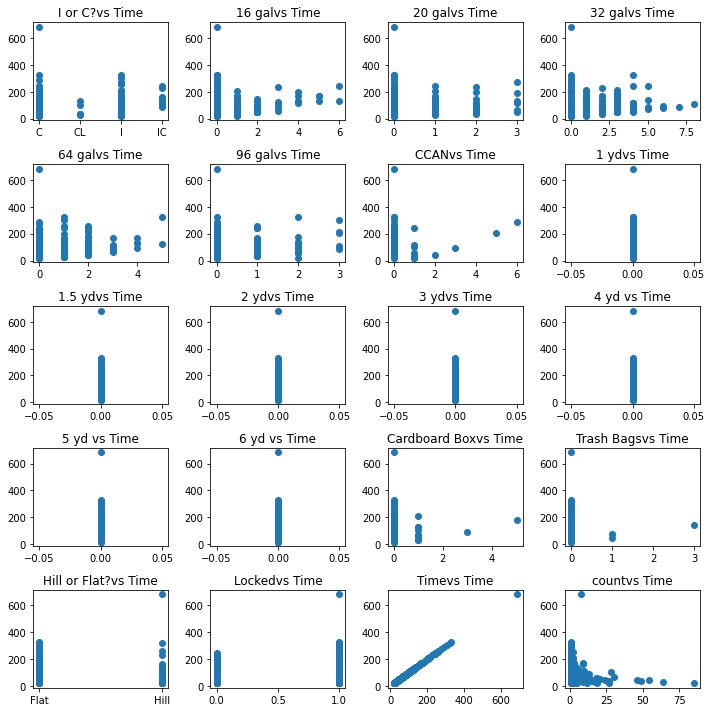

In [ ]:
fig, ax = plt.subplots(5, 4,figsize=(10,10))
c=0
for i in range(5):
    for j in range(4):
        ax[i][j].scatter(df_group[columns_list[c]],df_group['Time'])
        ax[i][j].set_title(columns_list[c]+'vs Time')

        c+=1

plt.tight_layout()

## Regression trees

In [ ]:
# Transforming Hill data
df_group['Hill or Flat?']=np.where(df_group['Hill or Flat?']== 'Hill', 1, 0)

In [ ]:
#Transforming I or C data
df_group['I']=np.where(df_group['I or C?']=='I',1,0)
df_group['C']=np.where(df_group['I or C?']=='C',1,0)
df_group['IC']=np.where(df_group['I or C?']=='IC',1,0)
df_group['CL']=np.where(df_group['I or C?']=='CL',1,0)


In [ ]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 259
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   I or C?        259 non-null    object 
 1   16 gal         259 non-null    int64  
 2   20 gal         259 non-null    int64  
 3   32 gal         259 non-null    int64  
 4   64 gal         259 non-null    int64  
 5   96 gal         259 non-null    int64  
 6   CCAN           259 non-null    int64  
 7   1 yd           259 non-null    int64  
 8   1.5 yd         259 non-null    int64  
 9   2 yd           259 non-null    int64  
 10  3 yd           259 non-null    int64  
 11  4 yd           259 non-null    int64  
 12  5 yd           259 non-null    int64  
 13  6 yd           259 non-null    int64  
 14  Cardboard Box  259 non-null    int64  
 15  Trash Bags     259 non-null    int64  
 16  Hill or Flat?  259 non-null    int64  
 17  Locked         259 non-null    int64  
 18  Time      

In [ ]:
X_columns=df_group.columns[1:18].values
X_columns_2=df_group.columns[20:24].values
X_columns=list(set(X_columns).union(set(X_columns_2)))
X_columns.sort()
X_columns

['1 yd',
 '1.5 yd',
 '16 gal',
 '2 yd',
 '20 gal',
 '3 yd',
 '32 gal',
 '4 yd ',
 '5 yd ',
 '6 yd ',
 '64 gal',
 '96 gal',
 'C',
 'CCAN',
 'CL',
 'Cardboard Box',
 'Hill or Flat?',
 'I',
 'IC',
 'Locked',
 'Trash Bags']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=4,
            random_state=3)
X=df_group[X_columns]

Y=df_group[df_group.columns[18]]


In [ ]:
X

,1 yd,1.5 yd,16 gal,2 yd,20 gal,3 yd,32 gal,4 yd,5 yd,6 yd,64 gal,96 gal,C,CCAN,CL,Cardboard Box,Hill or Flat?,I,IC,Locked,Trash Bags
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,1,0,0
256,0,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,1,1,0
257,0,0,0,0,0,0,5,0,0,0,1,1,0,0,0,0,0,0,1,0,0
258,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
dt = DecisionTreeRegressor(max_depth=10,
             min_samples_leaf=0.3,
            random_state=1)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.3, random_state=1)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
y_pred = dt.predict(X)
mse_dt = MSE(Y, y_pred)
rmse_dt = mse_dt**(1/2)
print("Training error of dt: {:.2f}".format(rmse_dt))

Training error of dt: 67.99


In [ ]:
from sklearn.metrics import mean_squared_error as MSE
y_test_pred = dt.predict(X_test)
mse_test_dt = MSE(Y_test, y_test_pred)
rmse_test_dt = mse_test_dt**(1/2)
print("Test error of dt: {:.2f}".format(rmse_test_dt))

Test error of dt: 54.74


In [ ]:
final_with_pred = pd.DataFrame({'Actual':Y, 'Prediction':y_pred})
final_with_pred

,Actual,Prediction
0,29.0,110.809524
1,64.0,110.809524
2,683.5,110.809524
3,20.0,110.809524
4,21.5,110.809524
...,...,...
255,228.0,89.422764
256,164.0,89.422764
257,244.0,89.422764
258,154.0,89.422764


In [ ]:
mape_tree=np.average(np.abs((y_pred-Y))/Y)
accuracy_tree=(1-mape_tree)*100
print("Accuracy of the training tree model {:.2f}".format(accuracy_tree))

Accuracy of the training tree model 34.06


In [ ]:
mape_tree_test=np.average(np.abs((y_test_pred-Y_test))/Y_test)
accuracy_tree_test=(1-mape_tree_test)*100
print("Accuracy of the test tree model {:.2f}".format(accuracy_tree_test))

Accuracy of the test tree model 29.13
